In [1]:
# importing all the necessary libraries
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline

In [2]:
# loading the dataset into a dataframe for manipulation
df = pd.read_csv('Whatsapp_Chat_Table.csv', index_col=0)

In [3]:
# converted to datetime datatype as the default datatype considered was object
df['date_time'] = pd.to_datetime(df.date_time, format='%Y-%m-%d %H:%M:%S')

In [4]:
df['date_time'].dtype

dtype('<M8[ns]')

In [5]:
# bifurcating datetime into 4 different columns for further analysis
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [6]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


### 1. Most Active Users of the group 

In [7]:
print(f"The number of people in the group who haven't sent a single text on the group = {237 - len(df.user.unique())-1}")

The number of people in the group who haven't sent a single text on the group = 81


In [8]:
df2 = df.copy()    

# extracting only messages from the dataset
df2 = df2[df2.user != "group_notification"]

# counting the number of messages and grouping them by person
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,"Tanay Kamath (TSEC, CS)",2476
1,"Dheeraj Lalwani (TSEC, CS)",1888
2,"Darshan Rander (TSEC, IT)",1387
3,"Kartik Soneji (TSEC, CS)",792
4,"Harsh Kapadia (TSEC IT, SE)",748
5,"Pratik K (TSEC CS, SE)",732
6,"Saurav Upoor (TSEC CS, SE)",534
7,Tushar Nankani,323
8,+91 82916 21138,269
9,"Farhan Irani (TSEC IT, SE)",252


In [9]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]

top10df.initials[8] = "Unknown"  #since the number is not saved we'll just put it as an unknown number

C:\Users\Sushanth Bhat\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sushanth Bhat\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


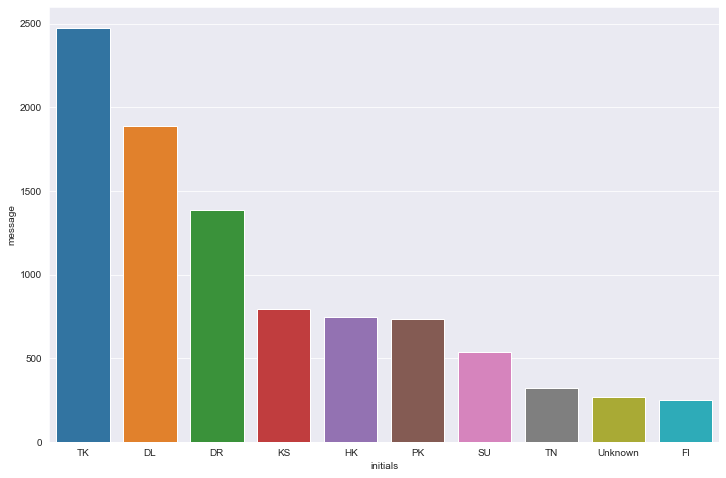

In [10]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8))

sns.barplot(top10df.initials, top10df.message, data=top10df);
# plt.plot(top10df.initials, top10df.message, 'o--c', color='m');   # line chart
